<a href="https://colab.research.google.com/github/vvish0511/Netflix/blob/main/NetflixDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries and Data
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob
df=pd.read_csv("netflix_titles.csv")

In [ ]:
df.shape

(8807, 12)

In [ ]:
#print top 5 rows of the dataset, to see how the what data is present in it
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
 #print all the counts of ratings
x = df.groupby(["rating"]).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [ ]:
x_filtered = x.iloc[3:].reset_index(drop=True)
print(x_filtered)

      rating  counts
0          G      41
1      NC-17       3
2         NR      80
3         PG     287
4      PG-13     490
5          R     799
6      TV-14    2160
7       TV-G     220
8      TV-MA    3207
9      TV-PG     863
10      TV-Y     307
11     TV-Y7     334
12  TV-Y7-FV       6
13        UR       3


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pieChart=px.pie(x_filtered,values='counts', names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

In [ ]:
#fill the Director whereever Nan as 'Director not specified', Basically filling the Nan values with some meaningful value.
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Create an empty directors list
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#Get the list of director names
directors_list=df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
#Now put the directors list into dataframe, so you have the data in rows and column
directors_list=directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
#Give the column name as Director, changed from column 0 to Director
directors_list.columns=['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
# Take count of Directors and how many total content they created
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [ ]:
#Remove 'Director not specified' from the list as we don't want to analyze them
directors=directors[directors.Director != 'Director not specified']
print(directors) # You can see below one of the rows eliminated, and became 3736

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
#To sort  the count of directors
directors=directors.sort_values(by=['Total Count'])
print(directors)

             Director  Total Count
2560  Joanna Lombardi            1
2802       K. Subhash            1
2803     K.C. Bokadia            1
2804   K.S. Ravikumar            1
2805     KVR Mahendra            1
...               ...          ...
4652      Suhas Kadav           16
3236     Marcus Raboy           16
4068      Raúl Campos           18
261         Jan Suter           18
4021    Rajiv Chilaka           22

[5120 rows x 2 columns]


In [ ]:
# To make order to descending, change,
directors=directors.sort_values(by=['Total Count'], ascending= False)
print(directors)

           Director  Total Count
4021  Rajiv Chilaka           22
261       Jan Suter           18
4068    Raúl Campos           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16
...             ...          ...
3218    Marc Meyers            1
3217     Marc Levin            1
3216   Marc Francis            1
3215  Marc Fouchard            1
5014  Will Lovelace            1

[5120 rows x 2 columns]


In [ ]:
#Print top 5 directors
top5Directors=directors.head()
print(top5Directors)

           Director  Total Count
4021  Rajiv Chilaka           22
261       Jan Suter           18
4068    Raúl Campos           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16


In [ ]:
#Creating a horizontal bar chart to display the above
top5Directors=top5Directors.sort_values(by=['Total Count'])
barChart= px.bar(top5Directors, x='Total Count' , y='Director', title='Top 5 Directors on Netflix')
barChart.show()
#To sort in descending order, as done in first line of this code block

In [ ]:
## analyze top 5 actors on netflix. Take actor name from cast. Replace nan values
df['cast'] = df['cast'].fillna('No cast specified')
cast_df=pd.DataFrame()
cast_df=df['cast'].str.split(',', expand=True).stack()
cast_df=cast_df.to_frame()
cast_df.columns=['Actor']
actors=cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count') #Take the count of actors by grouping them
actors=actors[actors.Actor != 'No cast specified']
actors=actors.sort_values(by=['Total Count'], ascending=False)
top5Actors=actors.head()
top5Actors=top5Actors.sort_values(by=['Total Count'])
barChart2=px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()

#Analyze the content produced on netfix based on years

In [ ]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year":"Release Year", "type":"Type"})
#Count of content produced every year
df2=df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [ ]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [ ]:
#Trend of the content released in each year(line graph)
graph=px.line(df2, x="Release Year", y="Total Count", color="Type", title="Trend of Content Produced by Netflix Every Year")
graph.show()


In [ ]:
# To get the trend from particular year like 2000 or 2010 onwards
df2=df2[df2['Release Year']>= 2000]
graph=px.line(df2, x="Release Year", y="Total Count", color="Type", title="Trend of Content Produced by Netflix Every Year")
graph.show()

Perform Sentiment Analysis to check the polarity of the content whether it is positive, negative or neutral(based on year and description).

In [ ]:
df3=df[['release_year','description']]
df3=df3.rename(columns= {'release_year':'Release Year', 'description':'Description'})
for index,row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
     sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index,2], 'Sentiment']=sent

df3=df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Count')
df3=df3[df3['Release Year']>2005]
barGraph=px.bar(df3, x="Release Year", y="Total Count", color='Sentiment', title='Sentiment Anaysis of Content on Netflix since 2006')
barGraph.show()

From the above graph we can conclude that every year the positive content is increasing and negative content is less than the positive content. Netflix releases more positive content than negative content

In [ ]:
np.random.seed(42)  # For reproducibility
data = {
    'release_year': np.random.randint(2000, 2021, 100),
    'duration': np.random.randint(80, 181, 100),
    'genre': np.random.choice(['Action', 'Comedy', 'Drama', 'Documentary'], 100),
}

df = pd.DataFrame(data)

# Assuming you want to count titles within each genre as a Z axis value,
# we first need to aggregate the data.
# This is a simplification; your actual aggregation will depend on your data structure.
df_agg = df.groupby(['release_year', 'genre']).size().reset_index(name='count_titles')

# Since 'duration' was dropped during aggregation, let's rejoin it for the demonstration.
# In real use, you might aggregate duration differently.
df_merged = pd.merge(df_agg, df[['release_year', 'genre', 'duration']], on=['release_year', 'genre'], how='left')
df_merged = df_merged.drop_duplicates(subset=['release_year', 'genre'])

In [ ]:
fig = px.scatter_3d(df_merged, x='release_year', y='duration', z='count_titles',
                    color='genre',  # This highlights different genres
                    title='Netflix Titles: Release Year vs. Duration vs. Title Count by Genre')
fig.show()

In [ ]:
type(cast_df)

pandas.core.frame.DataFrame

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('/content/netflix_titles.csv')
df = df.dropna(subset=['rating'])

# Data preparation
df['description'] = df['description'].str.lower().str.strip()
df['director'].fillna('Unknown', inplace=True)
df['description'] = df['description'].str.replace('[^\w\s]', '', regex=True)  # Remove punctuation

# Vectorize descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)  # Increase max_features
X = tfidf.fit_transform(df['description'])

# Encode ratings
le = LabelEncoder()
y = le.fit_transform(df['rating'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)  # Adjust model parameters
model.fit(X_train, y_train)

# Function to predict the rating from the description
def predict_rating(description):
    # Transform the input using the same vectorizer
    input_vec = tfidf.transform([description.lower().strip()])
    # Make prediction
    prediction = model.predict(input_vec)
    # Decode the predicted rating
    predicted_rating = le.inverse_transform(prediction)
    return predicted_rating[0]

# Interactive part
input_description = input("Enter the description of the movie/show: ")
predicted_rating = predict_rating(input_description)
print("Predicted Rating:", predicted_rating)

Enter the description of the movie/show: Blood & Water
Predicted Rating: TV-MA


In [ ]:
!pip install pandas scikit-learn
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/netflix_titles.csv')
from sklearn.feature_extraction.text import CountVectorizer

# Text preprocessing
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(data['description'])
from sklearn.cluster import KMeans

# Assuming we decide to create 5 clusters (you can choose the number based on your data)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
data['cluster'] = kmeans.labels_
# Example mapping (you'll need to adjust this based on your analysis)
genre_to_cluster = {
    'comedy': 0,
    'thriller': 1,
    'horror': 2,
    'action': 3,
    'romance': 4
}
def find_movies_by_genre(genre):
    cluster_id = genre_to_cluster[genre]
    return data[data['cluster'] == cluster_id]['title'].tolist()
# Example usage
print(find_movies_by_genre('comedy'))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['Dick Johnson Is Dead', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Grown Ups', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Squid Game', 'The Father Who Moves Mountains', 'The Stronghold', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws: The Revenge', 'My Heroes Were Cowboys', 'The Smart Money Woman', 'Training Day', 'Castle and Castle', 'Dharmakshetra', 'InuYasha the Movie 3: Swords of an Honorable Ruler', 'InuYasha the Movie: Affections Touching Across Time', 'Nailed It', 'Naruto Shippuden the Movie: Blood Prison', 'Naruto Shippûden the Movie: Bonds', 'Naruto Shippûden the Movie: The Will of Fire', 'Naruto S

In [ ]:
def find_movies_by_genre(genre):
    cluster_id = genre_to_cluster[genre]
    return data[data['cluster'] == cluster_id]['title'].tolist()

print(find_movies_by_genre('horror'))


['Midnight Mass', 'The Starling', 'Je Suis Karl', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Birth of the Dragon', 'Jaws 3', 'Safe House', 'InuYasha the Movie 4: Fire on the Mystic Island', 'Firedrake the Silver Dragon', 'Mighty Raju', 'In the Cut', 'Letters to Juliet', "My Boss's Daughter", 'Thimmarusu', 'D.P.', 'Krishna Cottage', 'Man in Love', 'The Chair', 'A Faraway Land', 'Nneka The Pretty Serpent', 'O Kadhal Kanmani', 'Out of my league', 'Pahuna', 'Monster Hunter: Legends of the Guild', 'La diosa del asfalto', 'Chennai Express', "'76", 'Aftermath', "Autumn's Concerto", 'Ije: The Journey', "You're My Destiny", 'Freedomland', 'Hunter X Hunter (2011)', 'Poms', 'Flower Girl', 'Blood Red Sky', 'Feels Like Ishq', 'Chhota Bheem & Krishna: Mayanagari', 'Chhota Bheem: The Rise of Kirmada', 'Too Hot to Handle: Brazil', 'Okupas', 'Mama Drama', 'Therapy', 'Three Thieves', 'Terrace House: Opening New Doors', 'Mary Magdalene', 'Mobile Suit Gundam Hathaway', 'Voiceless', 'Mommy Issues'

In [ ]:
def find_movies_by_genre(genre):
    cluster_id = genre_to_cluster[genre]
    return data[data['cluster'] == cluster_id]['title'].tolist()

print(find_movies_by_genre('comedy'))


['Dick Johnson Is Dead', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Grown Ups', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Squid Game', 'The Father Who Moves Mountains', 'The Stronghold', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws: The Revenge', 'My Heroes Were Cowboys', 'The Smart Money Woman', 'Training Day', 'Castle and Castle', 'Dharmakshetra', 'InuYasha the Movie 3: Swords of an Honorable Ruler', 'InuYasha the Movie: Affections Touching Across Time', 'Nailed It', 'Naruto Shippuden the Movie: Blood Prison', 'Naruto Shippûden the Movie: Bonds', 'Naruto Shippûden the Movie: The Will of Fire', 'Naruto S

In [ ]:
def find_movies_by_genre(genre):
    cluster_id = genre_to_cluster[genre]
    return data[data['cluster'] == cluster_id]['title'].tolist()

print(find_movies_by_genre('romance'))


['Blood & Water', 'Sex Education', 'Saved by the Bell', "Kuroko's Basketball", 'Titletown High', 'Rascal Does Not Dream of Bunny Girl Senpai', 'AlRawabi School for Girls', 'Cocaine Cowboys: The Kings of Miami', 'Control Z', "Ferris Bueller's Day Off", 'My Girl 2', 'The Edge of Seventeen', 'All American', 'Deep', 'The Beguiled', 'Twilight', 'BEASTARS', 'Derry Girls', 'Good Morning Call', 'The Worst Witch', 'Audible', 'Not Another Teen Movie', 'Snow Day', 'The Best of Enemies', 'The Daily Life of the Immortal King', 'Nevertheless,', 'Black Lightning', 'Riverdale', 'The Judgement', 'A Family', 'Elite', 'Biking Borders', "Let's Eat", 'Ouran High School Host Club', 'Black Space', 'The Magic School Bus', 'Kocan Kadar Konus', 'Taare Zameen Par', 'Dancing Angels', 'Fate: The Winx Saga', 'Law School', 'The Underclass', 'Accepted', 'Wild Child', '3 Idiots', 'Legally Blonde', 'Rainbow High', 'Loyiso Gola: Unlearning', 'Mucize', 'Geez & Ann', 'M8 - When Death Rescues Life', 'Classmates Minus', 'To

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load your dataset
data = pd.read_csv('/content/netflix_titles.csv')  # Adjust path as necessary

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
data['description'] = data['description'].fillna('')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(data['description'])


In [ ]:
def recommend_movies(title, tfidf_matrix, data, top_k=5):
    # Find the index of the movie that matches the title
    idx = data[data['title'].str.lower() == title.lower()].index[0]

    # Compute the cosine similarity matrix
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix)

    # Get the scores of all movies with their indices
    sim_scores = list(enumerate(cosine_similarities[0]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #  scores for the top 5 most similar movies
    sim_scores = sim_scores[1:top_k+1]

    movie_indices = [i[0] for i in sim_scores]


    return data['title'].iloc[movie_indices]


In [ ]:
recommended_movies = recommend_movies('Sankofa', tfidf_matrix, data)
print(recommended_movies)


8353           The Hunt
7037      I Am Jane Doe
5580      One More Time
5653          My Runway
3619    I'm Brent Morin
Name: title, dtype: object


In [ ]:
recommended_movies = recommend_movies('Jeans', tfidf_matrix, data)
print(recommended_movies)


3421       Sinister 2
123         Luv Kushh
3197         Mahi NRI
3650    Twins Mission
5537      The Miracle
Name: title, dtype: object


In [ ]:
!pip install matplotlib seaborn
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity_heatmap(title, tfidf_matrix, data, top_k=5):
    # Find the index of the movie that matches the title
    idx = data[data['title'].str.lower() == title.lower()].index[0]

    # Compute the cosine similarity matrix
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix)

    # Get the scores of all movies
    sim_scores = list(enumerate(cosine_similarities[0]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores for the top_k+1 most similar movies (including the input movie)
    sim_scores = sim_scores[:top_k+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Create a smaller cosine similarity matrix for the selected movies
    small_cosine_similarities = linear_kernel(tfidf_matrix[movie_indices], tfidf_matrix[movie_indices])

    # Plotting the heatmap
    sns.set(style="white")
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(small_cosine_similarities, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=data['title'].iloc[movie_indices].values, yticklabels=data['title'].iloc[movie_indices].values)
    plt.title('Cosine Similarity Heatmap')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    return data['title'].iloc[movie_indices]


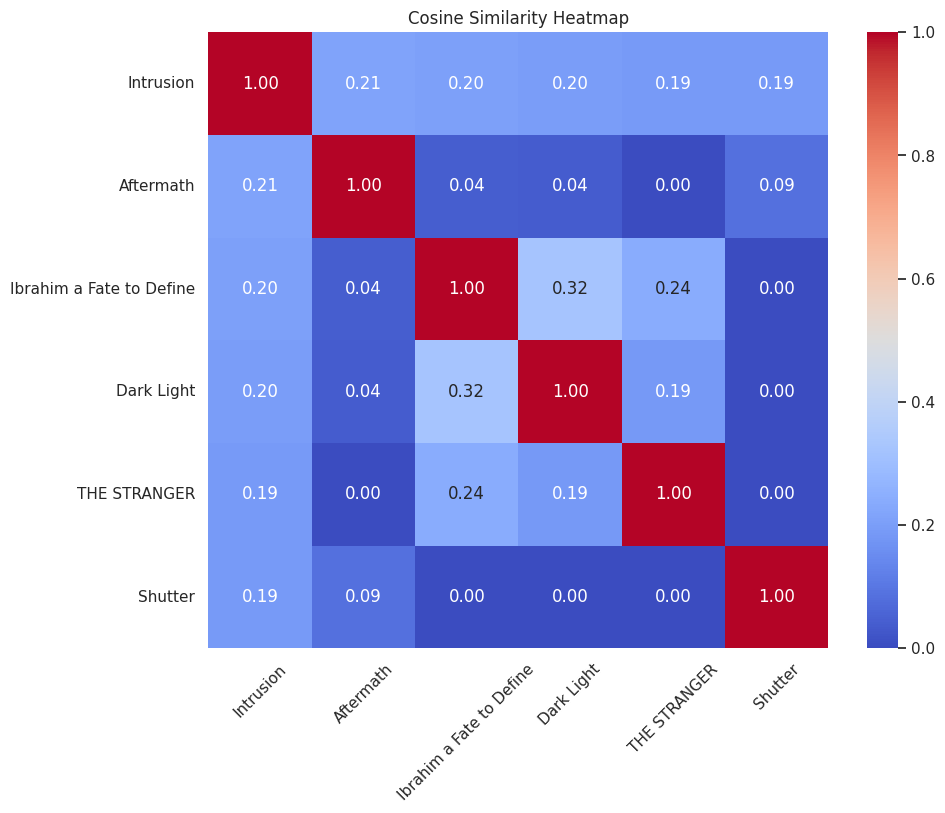

18                     Intrusion
307                    Aftermath
1117    Ibrahim a Fate to Define
2705                  Dark Light
2979                THE STRANGER
8013                     Shutter
Name: title, dtype: object


In [ ]:
recommended_movies = plot_similarity_heatmap('Intrusion', tfidf_matrix, data)
print(recommended_movies)


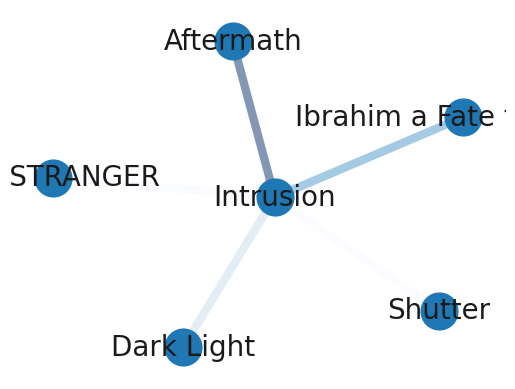

In [ ]:
!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

def create_network_graph(title, tfidf_matrix, data, top_k=5):
    idx = data[data['title'].str.lower() == title.lower()].index[0]
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix)
    sim_scores = list(enumerate(cosine_similarities[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_k+1]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges
    for score in sim_scores:
        movie_id, similarity = score
        G.add_edge(title, data['title'].iloc[movie_id], weight=similarity)

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=6, alpha=0.5, edge_color=weights, edge_cmap=plt.cm.Blues)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.axis('off')  # Turn off the axis
    plt.show()

# Example usage
create_network_graph('Intrusion', tfidf_matrix, data, top_k=5)


In [ ]:
!pip install geopandas matplotlib


<ipython-input-45-f71932a45339>:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



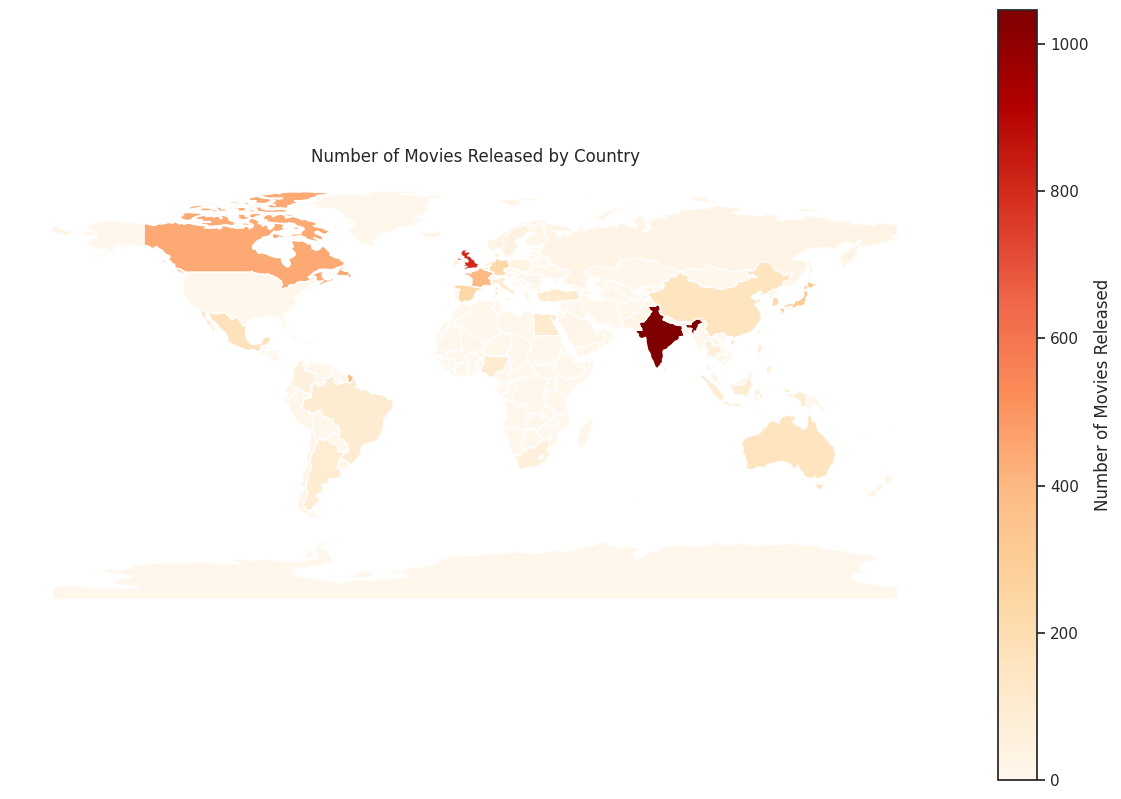

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/netflix_titles.csv')

# Assuming there's a 'country' column with names of countries separated by comma
# We need to count the occurrences of each country
country_counts = data['country'].str.split(', ').explode().value_counts()

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the country counts
world = world.merge(country_counts.rename('movie_count'), left_on='name', right_index=True, how='left')

# Fill NaN values with 0
world['movie_count'] = world['movie_count'].fillna(0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='movie_count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Movies Released"},
           cmap='OrRd')  # Color map
ax.set_title('Number of Movies Released by Country')
ax.set_axis_off()  # Remove axis
plt.show()


In [ ]:
!pip install plotly


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset
data = pd.read_csv('/content/netflix_titles.csv')

# Assuming there's a 'country' column with names of countries separated by comma
country_counts = data['country'].str.split(', ').explode().value_counts().reset_index()
country_counts.columns = ['country', 'movie_count']

# Create interactive map
fig = px.choropleth(country_counts, locations="country",
                    locationmode='country names',
                    color="movie_count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Number of Movies Released by Country')

# Update layout to ensure title and legend are clearly displayed
fig.update_layout(
    title={
        'text': "Number of Movies Released by Country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title_text='Movie Count',
    autosize=True,
    margin={"r":30, "t":100, "l":30, "b":0},
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

# Show the plot
fig.show()
